In [ ]:
# from mmdet.apis import init_detector, inference_detector

# config_file = 'rtmdet_tiny_8xb32-300e_coco.py'
# checkpoint_file = 'rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
# model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
# inference_detector(model, 'demo/demo.jpg')

In [ ]:
from mmcv.transforms import LoadImageFromFile
import matplotlib.pyplot as plt
import cv2

# backend_args = dict(channel_order='bgr')
backend_args = None

loader = LoadImageFromFile(to_float32=True, color_type='color', imdecode_backend='tifffile', backend_args=backend_args)
loader

In [ ]:
from pathlib import Path  

immagini_path = Path('/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/vessels/imgs')
paths = list(immagini_path.glob('*.tif'))

medie1, medie2, medie3 = [], [], []
dev1, dev2, dev3 = [], [], []
for idx,path in enumerate(paths):

    l = loader(results={'img_path': path})
    img = l['img']
    a,b,c = img[:,:,0], img[:,:,1], img[:,:,2]


    m1, m2, m3 = a.mean(), b.mean(), c.mean()
    s1, s2, s3 = a.std(), b.std(), c.std()
    
    medie1.append(m1)
    medie2.append(m2)
    medie3.append(m3)
    
    dev1.append(s1)
    dev2.append(s2)
    dev3.append(s3)

In [ ]:
import numpy as np 

print(np.mean(medie1))
print(np.mean(medie2))
print(np.mean(medie3))

print(np.mean(dev1))    
print(np.mean(dev2))
print(np.mean(dev3))



In [ ]:
import numpy as np

def mean_without_outliers(data):
    Q1 = np.percentile(data, 35)
    Q3 = np.percentile(data, 65)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    return np.mean(filtered_data)

In [ ]:
print(mean_without_outliers(medie1))
print(mean_without_outliers(medie2))
print(mean_without_outliers(medie3))
print(mean_without_outliers(dev1))    
print(mean_without_outliers(dev2))
print(mean_without_outliers(dev3))

In [ ]:
# make an histogram of the mean values
plt.hist(medie1, bins=100)
plt.show()

# 

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(img[:,:,2])

In [ ]:
# from pathlib import Path
# import pandas as pd  
# import os

# workdir = "/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_104839"
# pesi = Path(workdir).glob('*.pth')
# # find the file scalars.json in the workdir folder:
# scalars = list(Path(workdir).glob('**/scalars.json'))

# data = pd.read_json(scalars[0], lines=True)
# data

# # find the row with the max value of coco/bbox_mAP_50:
# row = data[data['coco/bbox_mAP_50'] == data['coco/bbox_mAP_50'].max()]
# step, value = row['step'].values[0], row['coco/bbox_mAP_50'].values[0]
# print(step, value)

# print(list(pesi))
# # delete all the files that are not the best one:
# for p in pesi:
#     nome = p.name
#     if nome != f'epoch_{step}.pth':
#         # delete the file:
#         os.remove(p)

from pathlib import Path
import pandas as pd  
import os

def manage_checkpoints(workdir):
    pesi = Path(workdir).glob('*.pth')
    scalars = list(Path(workdir).glob('**/scalars.json'))

    data = pd.read_json(scalars[0], lines=True)

    row = data[data['coco/bbox_mAP_50'] == data['coco/bbox_mAP_50'].max()]
    step, value = row['step'].values[0], row['coco/bbox_mAP_50'].values[0]
    print(step, value)

    print(list(pesi))

    for p in pesi:
        nome = p.name
        if nome != f'epoch_{step}.pth':
            os.remove(p)

# Call the function with the directory path
manage_checkpoints("/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_104839")



In [ ]:
# make a plot of the mAP@50 values:
data = data[data['coco/bbox_mAP_50'].notna()]
plt.figure(figsize=(5, 5))
# add style to the plot:
plt.style.use('seaborn-darkgrid')
plt.xlabel('step')
plt.ylabel('mAP@50')
plt.plot(data['step'], data['coco/bbox_mAP_50'])
plt.show()

# make a plot of the mAP values:
plt.figure(figsize=(5, 5))
# add style to the plot:
plt.style.use('seaborn-darkgrid')
plt.xlabel('step')
plt.ylabel('mAP')
plt.plot(data['step'], data['coco/bbox_mAP'])
plt.show()

# make a plot of the mAP@75 values:
plt.figure(figsize=(5, 5))
# add style to the plot:
plt.style.use('seaborn-darkgrid')
plt.xlabel('step')
plt.ylabel('mAP@75')
plt.plot(data['step'], data['coco/bbox_mAP_75'])
plt.show()  

In [ ]:
data

# filter data when coco/bbox_mAP_50 is none:
data = data[data['coco/bbox_mAP_50'].notna()]
data

In [ ]:
a = ["/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_094247","/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_095528","/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_095528","/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_100835", "/home/roberto/PythonProjects/S2RAWVessel/checkpoints/20230514_104839"]

In [58]:
def plot_checkpoints(workdir):
    """
    This function plots the 'coco/bbox_mAP_50' values in a given directory. It reads a JSON file named 'scalars.json',
    and plots the 'coco/bbox_mAP_50' values against the 'step' values.

    Parameters:
    workdir (str): The directory path which contains the checkpoint files and 'scalars.json'.

    Returns:
    None: The function plots the graph and doesn't return any value.
    """
    scalars = list(Path(workdir).glob('**/scalars.json'))
    title = list(Path(workdir).glob('**/*.py'))
    title = title[0].stem
    data = pd.read_json(scalars[0], lines=True)
    # plot all the coco/bbox_mAP values and save each one in the same folder
    data = data[data['coco/bbox_mAP_50'].notna()]

    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP@50')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP_50'])
    plt.savefig(f'{workdir}/mAP_50.png')
    plt.show()

    # make a plot of the mAP values:
    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP'])
    plt.savefig(f'{workdir}/mAP.png')
    plt.show()

    # make a plot of the mAP@75 values:
    plt.figure(figsize=(5, 5))
    # add style to the plot:
    plt.style.use('seaborn-darkgrid')
    plt.xlabel('step')
    plt.ylabel('mAP@75')
    plt.title(title)
    plt.plot(data['step'], data['coco/bbox_mAP_75'])
    plt.savefig(f'{workdir}/mAP_75.png')
    plt.show()  

/tmp/ipykernel_172981/2613548222.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


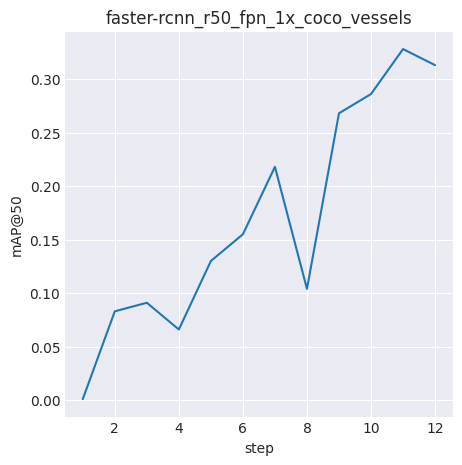

/tmp/ipykernel_172981/2613548222.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


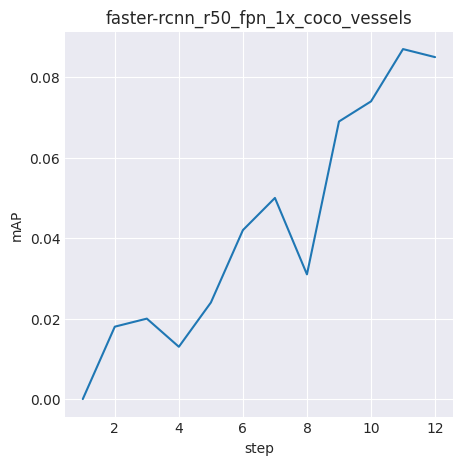

/tmp/ipykernel_172981/2613548222.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


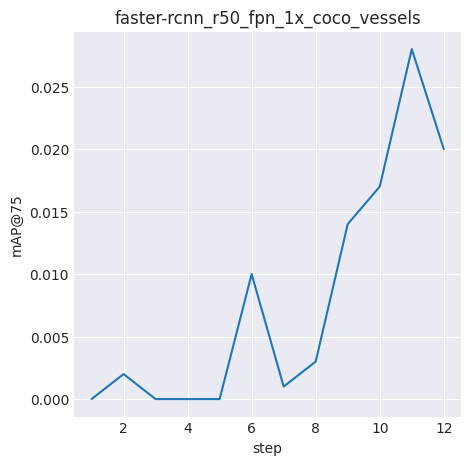

/tmp/ipykernel_172981/2613548222.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


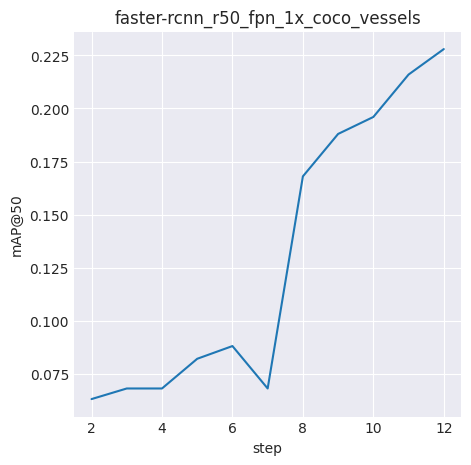

/tmp/ipykernel_172981/2613548222.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


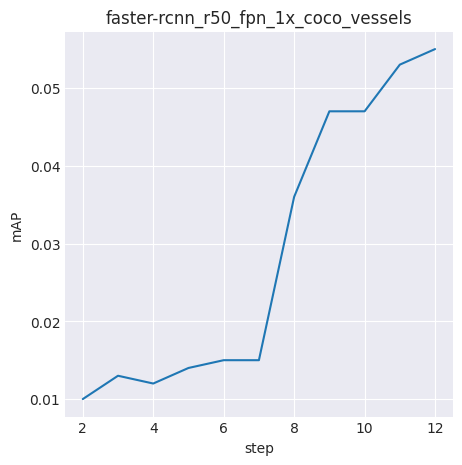

/tmp/ipykernel_172981/2613548222.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


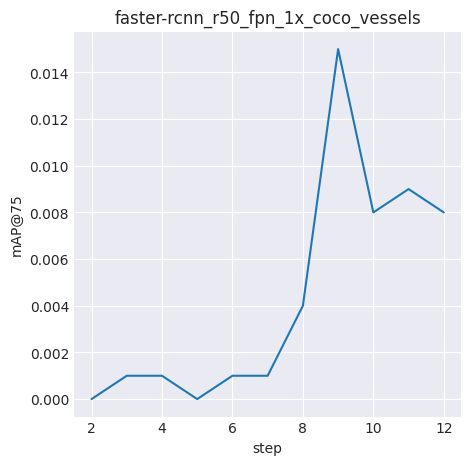

/tmp/ipykernel_172981/2613548222.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


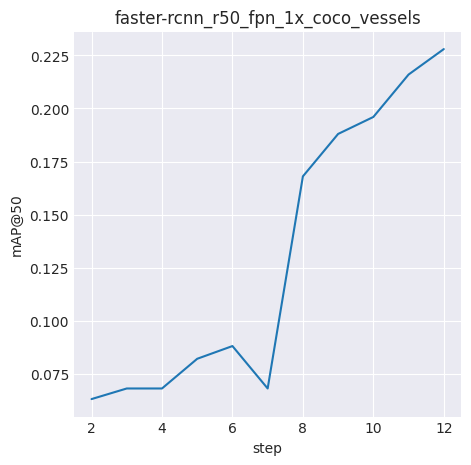

/tmp/ipykernel_172981/2613548222.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


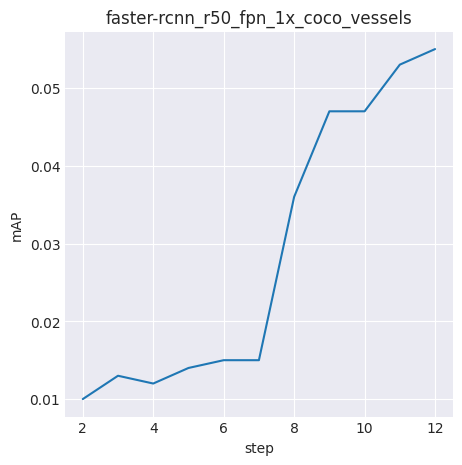

/tmp/ipykernel_172981/2613548222.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


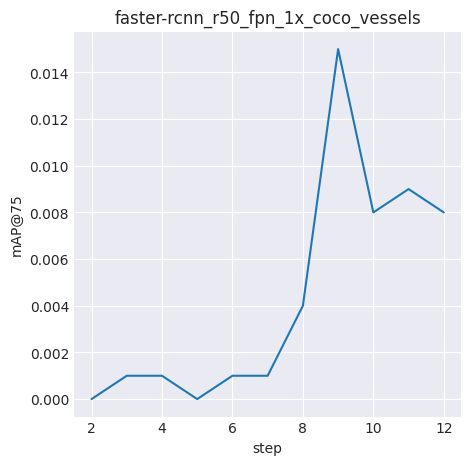

/tmp/ipykernel_172981/2613548222.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


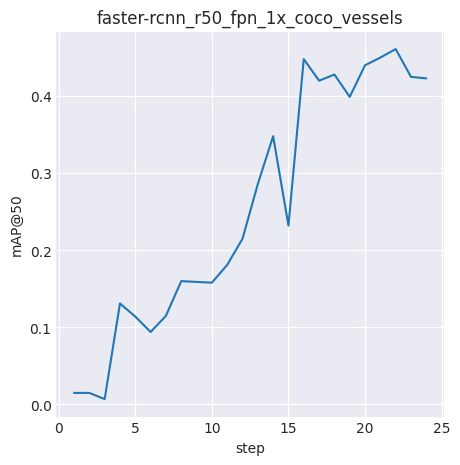

/tmp/ipykernel_172981/2613548222.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


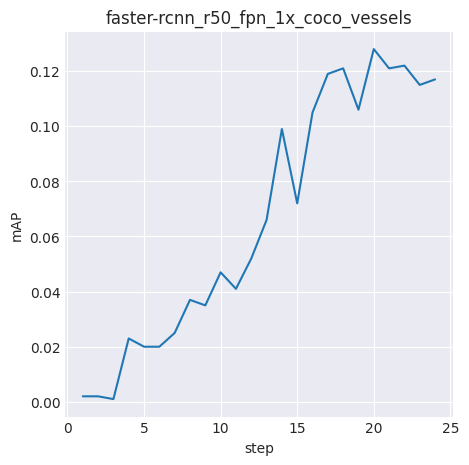

/tmp/ipykernel_172981/2613548222.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


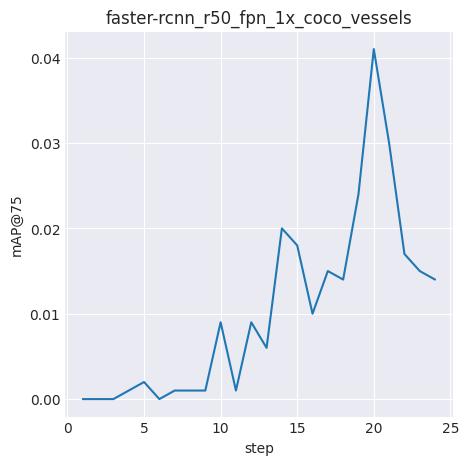

/tmp/ipykernel_172981/2613548222.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


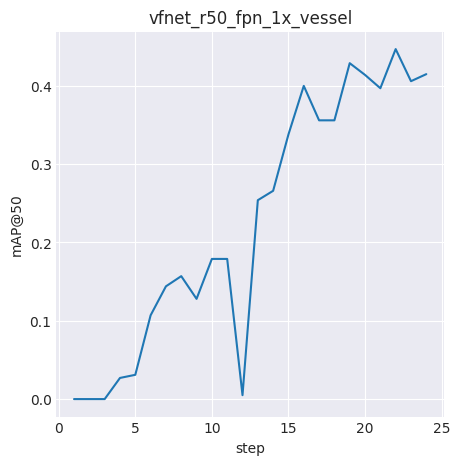

/tmp/ipykernel_172981/2613548222.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


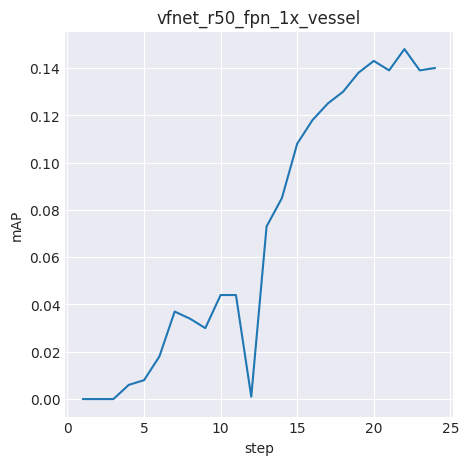

/tmp/ipykernel_172981/2613548222.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


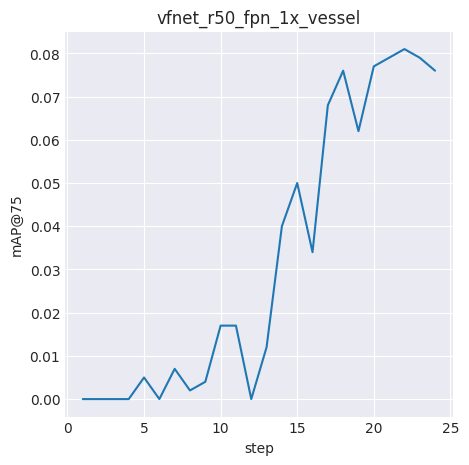

In [59]:
import os
for folder in a:
    data = plot_checkpoints(folder)